## Load Data from CSVs

In [52]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [53]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
def read_csv(filename):
    """Load data using filename"""
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [54]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

In [55]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    """Takes a date as a string, and returns a Python datetime object.
    If there is no date given, returns NoneTakes"""
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    """Takes a string which is either an empty string or represents an integer,
    and returns an int or None."""
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [56]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [57]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [58]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
#enrollment_num_rows = 
len(enrollments)

1640

In [59]:
unique_enrollment_students = set()
for enrollment in enrollments:
    unique_enrollment_students.add(enrollment['account_key'])
#enrollment_num_unique_students = 
len(unique_enrollment_students)

1302

In [60]:
#engagement_num_rows = 
len(daily_engagement)

136240

In [61]:
unique_engagement_students = set()
for engagement in daily_engagement:
    unique_engagement_students.add(engagement['acct'])
#engagement_num_unique_students = 
len(unique_engagement_students)

1237

In [62]:
#submission_num_rows = 
len(project_submissions)

3642

In [63]:
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
#submission_num_unique_students = 
len(unique_project_submitters)

743

## Problems in the Data

In [64]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del[engagement['acct']]


In [65]:
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [70]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [76]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_surprising_data = 0
for enrollment in enrollments:
        student = enrollment['account_key']
        one_day_cancel_state = enrollment['join_date'] != enrollment['cancel_date'] 
        if student not in unique_engagement_students and one_day_cancel_state:
            print enrollment
            num_surprising_data += 1
num_surprising_data

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Tracking Down the Remaining Problems

In [77]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [78]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    """Given some data with an account_key field, removes any records corresponding to Udacity test accounts"""
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [79]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [101]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students ={}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or \
                    enrollment_date > paid_students[account_key]:
                paid_students[account_key] = enrollment_date
        
len(paid_students)

995

## Getting Data from First Week

In [150]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    """Takes a student's join date and the date of a specific engagement record,
    and returns True if that engagement record happened within one week of the student joining."""
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [151]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
    """Create a list of rows from the engagement table including only rows where
    the student is one of the paid students you just found, and the date is within
    one week of the student's join date."""
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [152]:
for engagement in paid_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visted'] = 1
    else:
        engagement['has_visted'] = 0

In [153]:
print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [154]:
paid_engagement_in_first_week = []
for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [155]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [156]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [157]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [158]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes

3564.7332644989997

In [159]:
student_with_max_minutes

u'163'

In [160]:
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] == student_with_max_minutes:
        print engagement

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', 'has_visted': 1, u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', 'has_visted': 1, u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', 'has_visted': 1, u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', 'has_visted': 1, u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_v

## Lessons Completed in First Week

In [189]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
def group_data(data, key_name):
    """Group the records by account_key. Return the dictionary mapping account keys to lists of records"""
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

def sum_grouped_items(grouped_data, field_name):
    """Sum up all the entries for each account_key. (sucha as the total minutes visited and the lessons completed) """
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def evalute_data(items_evaluted):
    """Print summary statistics about the data. (mean, Standard deviation, min, and max)"""
    print 'Mean:', np.mean(items_evaluted)
    print 'Std:', np.std(items_evaluted)
    print 'Min/Max:', np.min(items_evaluted) ,"/", np.max(items_evaluted)
    print 'Median:', np.median(items_evaluted)

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
evalute_data(lessons_completed_by_account.values())


Mean: 1.63618090452
Std: 3.00256129983
Min/Max: 0 / 36
Median: 0.0


## Number of Visits in First Week

In [190]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
evalute_data(days_visited_by_account.values())

Mean: 2.86733668342
Std: 2.25519800292
Min/Max: 0 / 7
Median: 3.0


## Splitting out Passing Students

In [186]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and \
        (submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
len(pass_subway_project)

647

In [187]:
passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [194]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
'''Using group data function to group the data for passing or non_passing students by account key'''
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print '--------------------------'
print 'Metric: minutes spent'
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
evalute_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
evalute_data(passing_minutes.values())
print '--------------------------\n'

print 'Metric: lessons completed'
print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
evalute_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
evalute_data(passing_lessons.values())
print '--------------------------\n'

print 'Metric: days visited'
print 'non-passing students:'
non_passing_visited = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
evalute_data(non_passing_visited.values())

print 'passing students:'
passing_visited = sum_grouped_items(passing_engagement_by_account, 'has_visited')
evalute_data(passing_visited.values())



--------------------------
Metric: minutes spent
non-passing students:
Mean: 143.326474267
Std: 269.538619011
Min/Max: 0.0 / 1768.52274933
Median: 40.3652001666
passing students:
Mean: 394.586046484
Std: 448.499519327
Min/Max: 0.0 / 3564.7332645
Median: 264.528727667
--------------------------

Metric: lessons completed
non-passing students:
Mean: 0.862068965517
Std: 2.54915994183
Min/Max: 0 / 27
Median: 0.0
passing students:
Mean: 2.05255023184
Std: 3.14222705558
Min/Max: 0 / 36
Median: 1.0
--------------------------

Metric: days visited
non-passing students:
Mean: 1.90517241379
Std: 1.90573144136
Min/Max: 0 / 7
Median: 1.0
passing students:
Mean: 3.38485316847
Std: 2.25882147092
Min/Max: 0 / 7
Median: 3.0


## Making Histograms

In [267]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

def evalute_data(items_evaluted):
    """Print summary statistics about the data and make histograms. (mean, Standard deviation, min, and max)"""
    print 'Mean:', np.mean(items_evaluted)
    print 'Std:', np.std(items_evaluted)
    print 'Min/Max:', np.min(items_evaluted) ,"/", np.max(items_evaluted)
    print 'Median:', np.median(items_evaluted)
    plt.hist(items_evaluted, color = 'green', bins = 20)

Populating the interactive namespace from numpy and matplotlib


Mean: 394.586046484
Std: 448.499519327
Min/Max: 0.0 / 3564.7332645
Median: 264.528727667


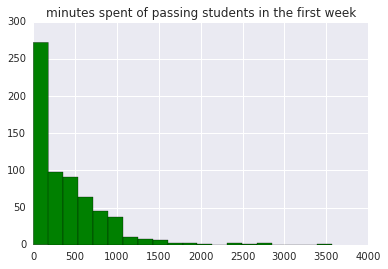

In [277]:
evalute_data(passing_minutes.values())
plt.xlabel("Minutes spent")
plt.ylabel("Students number")
plt.title("minutes spent of passing students in the first week")

Mean: 143.326474267
Std: 269.538619011
Min/Max: 0.0 / 1768.52274933
Median: 40.3652001666


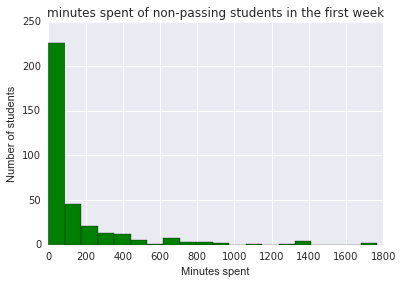

In [269]:
evalute_data(non_passing_minutes.values())
plt.xlabel("Minutes spent")
plt.ylabel("Number of students")
plt.title("minutes spent of non-passing students in the first week")

Mean: 3.38485316847
Std: 2.25882147092
Min/Max: 0 / 7
Median: 3.0


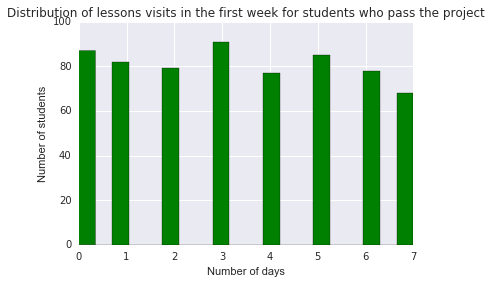

In [270]:
evalute_data(passing_visited.values())
plt.xlabel("Number of days")
plt.ylabel("Number of students")
plt.title("Distribution of lessons visits in the first week " +
          "for students who pass the project")

Mean: 1.90517241379
Std: 1.90573144136
Min/Max: 0 / 7
Median: 1.0


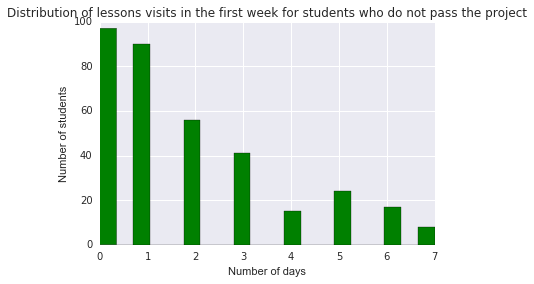

In [271]:
evalute_data(non_passing_visited.values())
plt.xlabel("Number of days")
plt.ylabel("Number of students")
plt.title("Distribution of lessons visits in the first week " +
          "for students who do not pass the project")

Mean: 2.05255023184
Std: 3.14222705558
Min/Max: 0 / 36
Median: 1.0


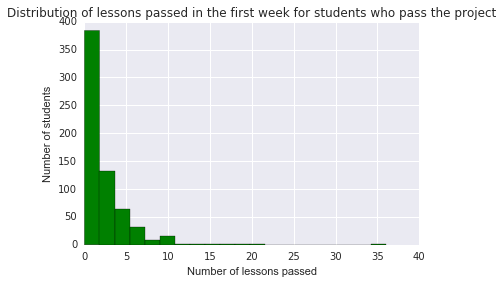

In [272]:
evalute_data(passing_lessons.values())
plt.xlabel("Number of lessons passed")
plt.ylabel("Number of students")
plt.title("Distribution of lessons passed in the first week " +
          "for students who pass the project")

Mean: 0.862068965517
Std: 2.54915994183
Min/Max: 0 / 27
Median: 0.0


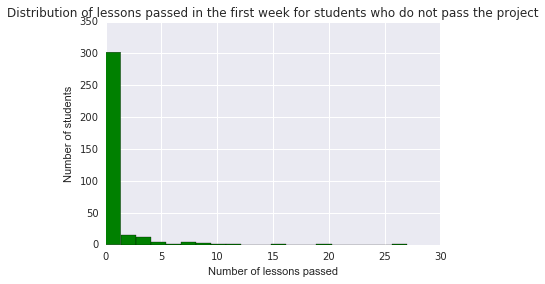

In [273]:
evalute_data(non_passing_lessons.values())
plt.xlabel("Number of lessons passed")
plt.ylabel("Number of students")
plt.title("Distribution of lessons passed in the first week " +
          "for students who do not pass the project")

## Improving Plots and Sharing Findings

In [275]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

print "These requirements has been satisfied in the previous step"

These requirements has been satisfied in the previous step
